In [1]:
import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
np.random.seed(42)

In [2]:
train_df=pd.read_csv('../../2022_Competition_Training.csv')
test_df=pd.read_csv('../../2022_Competition_Holdout.csv')

/Users/dp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (760) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
val_mode=False
dual_mode=True
smoteEnabled=False

In [4]:
def featureEngineerin(df):
    df['bh_anxiety']=df['bh_agad_pmpm_ct']+df['bh_aoth_pmpm_ct']+df['bh_apan_pmpm_ct']+df['bh_apho_pmpm_ct']+df['bh_atad_pmpm_ct']+df['bh_adtp_pmpm_ct']+df['bh_atot_pmpm_ct']
    df['bh_chemical_dp'] = df['bh_cdal_pmpm_ct']+ df['bh_cdsb_pmpm_ct']+df['bh_cdto_pmpm_ct']
    df['bh_depression']=df['bh_dema_pmpm_ct']+df['bh_deot_pmpm_ct']
    df['bh_nc_disorder']=df['bh_ncml_pmpm_ct']+df['bh_ncot_pmpm_ct']

    df['bh_neuro_dev_disorder']=df['bh_ndad_pmpm_ct']+df['bh_ednd_pmpm_ct']+df['bh_ndid_pmpm_ct']+ df['bh_ndlr_pmpm_ct']+df['bh_ndot_pmpm_ct']
    df['bh_suicide_ct']=df['bh_suat_pmpm_ct']+df['bh_suid_pmpm_ct']

    df['cci_chronic']=df['cci_dia_c_pmpm_ct']+df['cci_dia_m_pmpm_ct']
    df['cci_liver']=df['cci_lvr_m_pmpm_ct']+df['cci_lvr_s_pmpm_ct']
    df['cci_renal']=df['cci_ren_m_pmpm_ct']+df['cci_ren_s_pmpm_ct']

    df['credit_bal_']=df['credit_bal_nonmtgcredit_60dpd']+df['credit_bal_consumerfinance_new']+df['credit_bal_bankcard_severederog']+df['credit_bal_autobank_new']
    return df
    


In [5]:
required_cols=['hi_flag','id',
              'atlas_age65andolderpct2010',
'atlas_naturalchangerate1016',
'atlas_net_international_migration_rate',
'atlas_orchard_farms12',
'atlas_pct_diabetes_adults13',
'atlas_snapspth16',
'atlas_totalocchu',
'atlas_totalpopacs',
'atlas_totalpopest2016',
               'bh_auts_pmpm_ct',
'bh_bipr_pmpm_ct',
               'bh_ncdm_pmpm_ct',
               'bh_otic_pmpm_ct','bh_otsl_pmpm_ct',
'bh_otso_pmpm_ct',
'bh_psot_pmpm_ct',
'bh_schz_pmpm_ct',
         ##cci
#                'cci_chf_pmpm_ct',
# 'cci_mlg_pmpm_ct',
# 'cci_aoi_pmpm_ct',
# 'cci_cpd_pmpm_ct',
# 'cci_ctd_pmpm_ct',
# 'cci_cvd_pmpm_ct',
#            'cci_hiv_n_pmpm_ct',
#                'cci_mi_pmpm_ct',
# 'cci_mst_pmpm_ct',
# 'cci_ple_pmpm_ct',
# 'cci_pvd_pmpm_ct',
               'cci_score',
               
##cms
               'cms_ma_risk_score_nbr',
               'cms_ra_factor_type_cd',
'cms_orig_reas_entitle_cd',
'cms_race_cd',
               'cms_disabled_ind',
'cms_institutional_ind',
'cms_hospice_ind',
'cms_dual_eligible_ind',
'cms_low_income_ind',
'cms_ma_plan_ind',
'cms_frailty_ind',
##cmsd1
               'cmsd1_ano_pmpm_ct',
'cmsd1_bld_pmpm_ct',
'cmsd1_can_pmpm_ct',
'cmsd1_cir_pmpm_ct',
'cmsd1_dig_pmpm_ct',
'cmsd1_ear_pmpm_ct',
'cmsd1_end_pmpm_ct',
'cmsd1_ext_pmpm_ct',
'cmsd1_eye_pmpm_ct',
'cmsd1_gus_pmpm_ct',
'cmsd1_inf_pmpm_ct',
'cmsd1_inj_pmpm_ct',
'cmsd1_men_pmpm_ct',
'cmsd1_mus_pmpm_ct',
'cmsd1_neo_pmpm_ct',
'cmsd1_ner_pmpm_ct',
'cmsd1_pre_pmpm_ct',
'cmsd1_res_pmpm_ct',
'cmsd1_skn_pmpm_ct',
'cmsd1_sns_pmpm_ct',
'cmsd1_unc_pmpm_ct',
'cmsd1_vco_pmpm_ct',
               'cnt_cp_emails_pmpm_ct',
               'cnt_cp_livecall_pmpm_ct',
               'cnt_cp_print_pmpm_ct',
               
'cnt_cp_vat_pmpm_ct',
              'cnt_cp_webstatement_pmpm_ct',
              'cons_stlnindx',
'cons_ccip',
'cons_homstat',
'cons_stlindex',
'cons_hxmh',
'credit_hh_autobank',
              'est_age',
'lang_spoken_cd',
'med_er_ds_clm',
'med_ip_acute_ds_clm',
'med_ip_rehab_ds_clm',
'med_ip_snf_ds_clm',
'med_ambulance_ds_clm',
'med_urgent_care_ds_clm',
'med_outpatient_ds_clm',
'med_ip_ltach_ds_clm',
'med_physician_office_ds_clm',
'med_ip_maternity_ds_clm',
'med_er_obs_ds_clm',
'med_ip_mhsa_ds_clm',
'prov_line_pmpm_cnt',
                   'bh_anxiety','bh_chemical_dp','bh_depression','bh_nc_disorder',
               'bh_neuro_dev_disorder',
               'bh_suicide_ct','cci_chronic','cci_liver','cci_renal','credit_bal_'
               'rucc_category',
               'rwjf_homicides_rate',
               'rwjf_poor_men_hlth_days',
               'rwjf_premature_death_rate',
               'rwjf_dentists_ratio',
               'rwjf_air_pollute_density',
'rwjf_drinkwater_violate_ind',
               'rwjf_teen_births_rate',
'rwjf_mv_deaths_rate',
'rwjf_population',
'rwjf_violent_crime_rate',
'rwjf_premature_mortality',
'rwjf_child_mortality',
'rwjf_preventable_ip_rate',
'rwjf_hiv_rate',
'rwjf_poor_phy_hlth_days',
'rwjf_income_inequ_ratio',
'rwjf_men_hlth_prov_ratio',
'rwjf_std_infect_rate',
'rwjf_median_house_income',
'rwjf_pcp_rate',
'rwjf_food_env_inx',
               'rx_overall_pmpm_cost',
               'rx_days_since_last_script',
               'sex_cd',
              'cmsd2_men_mad_ind',
              ## SHAP
              'bh_depressionbh_nc_disorder',
'cci_mlg_pmpm_ct',
'cmsd2_eye_lacrimal_pmpm_ct',
'cmsd2_eye_vitreous_pmpm_ct',
'cmsd2_gus_urinary_other_pmpm_ct',
'cmsd2_skn_radiation_pmpm_ct',
'cmsd2_sns_digest_abdomen_pmpm_ct',
'cmsd2_sns_skn_pmpm_ct',
'cnt_cp_webstatement_0',
'cnt_cp_webstatement_10',
'cnt_cp_webstatement_2',
'credit_bal_',
'dcsi_score',
'rev_pm_asc_pmpm_cd_ct',
'rev_pm_lab_pmpm_cd_ct',
'rx_bh_pmpm_ct',
'rx_branded_pmpm_cost',
'rx_generic_pmpm_cost',
'rx_hum_56_pmpm_ct',
'rx_hum_91_pmpm_cost',
'rx_maint_pmpm_ct',
'rx_nonmail_pmpm_cost',
'rx_nonmaint_pmpm_cost',
'rx_pharmacies_pmpm_ct',
'total_physician_office_allowed_pmpm_cost'
              ]
len(required_cols)

139

In [6]:
required_cols=['hi_flag','id',
'est_age',
'cons_stlindex',
'cons_stlnindx',
'cons_homstat',
'cms_orig_reas_entitle_cd',
'cms_disabled_ind',
'total_physician_office_allowed_pmpm_cost',
'med_outpatient_ds_clm',
'rx_generic_pmpm_cost',
'rx_nonmaint_pmpm_cost',
'med_physician_office_ds_clm',
'rwjf_population',
'rx_nonmail_pmpm_cost',
'cons_ccip',
'rwjf_violent_crime_rate',
'atlas_naturalchangerate1016',
'atlas_orchard_farms12',
'atlas_totalocchu',
'rx_overall_pmpm_cost',
'atlas_age65andolderpct2010',
'atlas_totalpopest2016',
'rwjf_preventable_ip_rate',
'cnt_cp_webstatement_pmpm_ct',
'rwjf_hiv_rate',
'rwjf_premature_death_rate',
'rx_maint_pmpm_ct',
'atlas_snapspth16',
'cms_low_income_ind',
'atlas_net_international_migration_rate',
'atlas_totalpopacs',
'rwjf_child_mortality',
'cmsd1_end_pmpm_ct',
'rwjf_poor_phy_hlth_days',
'rwjf_median_house_income',
'rwjf_poor_men_hlth_days',
'rwjf_std_infect_rate',
'rwjf_homicides_rate',
'rwjf_dentists_ratio',
'atlas_pct_diabetes_adults13',
'rx_days_since_last_script',
'rwjf_premature_mortality',
'cnt_cp_vat_pmpm_ct',
'rwjf_air_pollute_density',
'rwjf_income_inequ_ratio',
'rx_branded_pmpm_cost',
'rwjf_teen_births_rate',
'rwjf_men_hlth_prov_ratio',
'rwjf_mv_deaths_rate',
'cmsd1_vco_pmpm_ct',
'cmsd1_sns_pmpm_ct',
'rwjf_pcp_rate',
'cnt_cp_emails_pmpm_ct',
'cmsd1_cir_pmpm_ct',
'rx_bh_pmpm_ct',
'cmsd1_men_pmpm_ct',
'cmsd1_mus_pmpm_ct',
'cnt_cp_print_pmpm_ct',
'rwjf_food_env_inx',
'cmsd1_res_pmpm_ct',
'cnt_cp_webstatement_0',
'cmsd1_ner_pmpm_ct',
'cnt_cp_webstatement_2',
'rx_pharmacies_pmpm_ct',
'cnt_cp_webstatement_10',
'cmsd1_dig_pmpm_ct',
'cmsd1_gus_pmpm_ct',
'rev_pm_lab_pmpm_cd_ct',
'rx_hum_91_pmpm_cost',
'cmsd1_eye_pmpm_ct',
'rx_hum_56_pmpm_ct',
'cci_score',
'cmsd2_skn_radiation_pmpm_ct',
'cons_hxmh',
'dcsi_score',
'prov_line_pmpm_cnt',
'cmsd1_inj_pmpm_ct',
'cms_ra_factor_type_cd_CN',
'med_er_ds_clm',
'cmsd2_sns_digest_abdomen_pmpm_ct',
'cci_chronic',
'bh_chemical_dp',
'cmsd1_bld_pmpm_ct',
'bh_anxiety',
'cms_dual_eligible_ind',
'cms_race_cd',
'cmsd1_can_pmpm_ct',
'cmsd1_skn_pmpm_ct',
'bh_depression',
'bh_otsl_pmpm_ct',
'cons_homstat',
'cms_ra_factor_type_cd_CP',
'cci_renal',
'rwjf_drinkwater_violate_ind',
'cons_homstat',
'cmsd2_sns_skn_pmpm_ct',
'med_urgent_care_ds_clm',
'sex_cd',
'med_ambulance_ds_clm',
'cms_race_cd',
'cmsd1_inf_pmpm_ct',
'med_ip_acute_ds_clm',
'cmsd2_men_mad_ind',
'cons_homstat',
'sex_cd',
'cmsd2_eye_vitreous_pmpm_ct',
'cmsd2_gus_urinary_other_pmpm_ct',
'cmsd1_ear_pmpm_ct',
'cci_liver',
'cmsd2_eye_lacrimal_pmpm_ct',
'cci_mlg_pmpm_ct',
'cmsd1_unc_pmpm_ct',
'rev_pm_asc_pmpm_cd_ct',
'cmsd1_ext_pmpm_ct',
'bh_nc_disorder',
'cms_ra_factor_type_cd_E',
'cms_ra_factor_type_cd_CF',
'cms_race_cd',
'med_ip_snf_ds_clm',
               'bh_depressionbh_nc_disorder',
'bh_neuro_dev_disorder',
'bh_suicide_ct'
              ]

In [7]:
len(required_cols)

123

In [8]:
train_df=featureEngineerin(train_df)
test_df=featureEngineerin(test_df)

In [9]:
tran_df_na=train_df.isna().sum()
tran_df_na.to_csv('tran_df_na.csv')

In [10]:
train_df.shape

(48300, 891)

In [11]:
tran_df_ok=tran_df_na[tran_df_na.values<18000]
tran_df_ok.to_csv('df_na_ok.csv')
tran_df_ok.shape

(872,)

In [12]:
filteredcol=tran_df_ok.index
filteredcol
df1=train_df[filteredcol].dropna()
print("filtered df shape" ,df1.shape)
print("train_df shape" ,train_df.shape)
required_cols=np.intersect1d(filteredcol,required_cols)
#required_cols=filteredcol
print("required_cols",len(required_cols))

filtered df shape (24511, 872)
train_df shape (48300, 891)
required_cols 112


In [13]:
required_cols_test=[]
for col in required_cols:
    required_cols_test.append(col)
required_cols_test.remove('hi_flag')
len(required_cols_test)

111

In [14]:
train_set=df1[required_cols] ## from cleaned dataframe

if dual_mode:
    print("dual_mode",dual_mode)
    train_set,val_set = train_test_split(train_set,test_size=0.3)
    val_target=val_set[['hi_flag']]
    train_target=train_set[['hi_flag']]


    val_inputs=val_set.drop(['hi_flag','id'],axis=1)
    train_inputs=train_set.drop(['hi_flag','id'],axis=1)
    result_set_id=test_df[['id']]
    test_inputs=test_df[required_cols_test].drop(['id'],axis=1)

    
else:
    print("val_mode",val_mode)
    result_set_id=test_df[['id']]
    
    train_target=train_set[['hi_flag']]
    train_inputs=train_set.drop(['hi_flag','id'],axis=1)

    test_inputs=test_df[required_cols_test].drop(['id'],axis=1)
    
print("train_inputs shape" ,train_inputs.shape)
print("val_inputs shape" ,val_inputs.shape)
print("test_inputs shape" ,test_inputs.shape)




dual_mode True
train_inputs shape (17157, 110)
val_inputs shape (7354, 110)
test_inputs shape (12220, 110)


In [15]:
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()
binary_columns=['cms_disabled_ind','cms_dual_eligible_ind','cms_frailty_ind','cms_hospice_ind','cms_institutional_ind','cms_low_income_ind','cms_ma_plan_ind','cmsd2_men_mad_ind']

numeric_columns=list(np.intersect1d(numeric_columns,required_cols))
categorical_columns=list(np.intersect1d(categorical_columns,required_cols))
binary_columns=list(np.intersect1d(binary_columns,required_cols))

for col in binary_columns:
    if col in numeric_columns:
        numeric_columns.remove(col)

print("numeric_columns",len(numeric_columns))
print("categorical_columns",len(categorical_columns))
print("binary_columns",len(binary_columns))


numeric_columns 103
categorical_columns 3
binary_columns 4


In [16]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
            ('binary', binary_transformer, binary_columns),

],
    remainder='passthrough')
# for x in categorical_columns:
#     print(x,"=>",train_inputs[x].unique())

# for x in binary_columns:
#     print(x,"=>",train_inputs[x].unique())

In [17]:
train_inputs['cms_race_cd']=train_inputs['cms_race_cd'].astype(str)
#train_inputs['rucc_category']=train_inputs['rucc_category'].astype(str)
train_inputs['sex_cd']=train_inputs['sex_cd'].astype(str)

val_inputs['cms_race_cd']=val_inputs['cms_race_cd'].astype(str)
#train_inputs['rucc_category']=train_inputs['rucc_category'].astype(str)
val_inputs['sex_cd']=val_inputs['sex_cd'].astype(str)


#test_df['cms_race_cd']=test_df['cms_race_cd'].astype(str)

In [18]:
train_inputs.isna().sum()

atlas_age65andolderpct2010                  0
atlas_naturalchangerate1016                 0
atlas_net_international_migration_rate      0
atlas_orchard_farms12                       0
atlas_pct_diabetes_adults13                 0
                                           ..
rx_nonmaint_pmpm_cost                       0
rx_overall_pmpm_cost                        0
rx_pharmacies_pmpm_ct                       0
sex_cd                                      0
total_physician_office_allowed_pmpm_cost    0
Length: 110, dtype: int64

In [19]:
print("train_inputs shape",train_inputs.shape)
print("train_target shape",train_target.shape)
print("train_inputs",train_target.value_counts()/len(train_target))

train_inputs shape (17157, 110)
train_target shape (17157, 1)
train_inputs hi_flag
0          0.965437
1          0.034563
dtype: float64


In [20]:
print("val_inputs shape",val_inputs.shape)
print("val_target shape",val_target.shape)
print("val_inputs",val_target.value_counts()/len(val_target))

val_inputs shape (7354, 110)
val_target shape (7354, 1)
val_inputs hi_flag
0          0.967093
1          0.032907
dtype: float64


In [21]:
print("test_inputs shape",test_inputs.shape)

test_inputs shape (12220, 110)


In [22]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTENC 
if smoteEnabled:
  sm = SMOTENC(categorical_features=[2,5,9],random_state=42)
  train_inputs, train_target = sm.fit_resample(train_inputs, train_target)

train_x = preprocessor.fit_transform(train_inputs)
val_x = preprocessor.fit_transform(val_inputs)
test_x = preprocessor.transform(test_inputs)
print('train_x.shape',train_x.shape)
print('test_x.shape',test_x.shape)
print('val_x.shape', val_x.shape)
print('train_inputs.shape',train_inputs.shape)
print('test_inputs.shape',test_inputs.shape)
print('val_inputs.shape',val_inputs.shape)
print("train_inputs",train_target.value_counts()/len(train_target))


train_x.shape (17157, 122)
test_x.shape (12220, 122)
val_x.shape (7354, 122)
train_inputs.shape (17157, 110)
test_inputs.shape (12220, 110)
val_inputs.shape (7354, 110)
train_inputs hi_flag
0          0.965437
1          0.034563
dtype: float64


In [23]:
train_x

array([[-0.8941256 ,  0.46891024, -0.74193118, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.0113107 , -0.04458605, -0.77514069, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05559346, -0.19197799, -0.69170931, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.19296418,  0.36375854, -0.73834583, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40126495,  0.27353206, -0.21185269, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59751715,  0.74401015,  0.5340803 , ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def printAuc(targetVal,predictedVal,labelName):
  print(confusion_matrix(targetVal,predictedVal))
  print(classification_report(targetVal,predictedVal))
  print(roc_auc_score(targetVal,predictedVal))
  fpr, tpr, thresholds = roc_curve(targetVal,predictedVal)
  auc = roc_auc_score(targetVal, predictedVal)
  plt.plot(fpr, tpr, label=f'AUC ('+labelName+') = {auc:.2f}')

In [25]:
def generateCsv(outputprob,predictedFlag,modelName):
  result_set=pd.DataFrame(None)
  result_set['ID']=result_set_id
  result_set['SCORE_ONE']=outputprob[:,1]
  result_set['SCORE_ZERO']=outputprob[:,0]
  result_set['FLAG']=predictedFlag
  x = datetime.datetime.now()
  result_set.to_csv('2022CaseCompetition_Sahil_Shah_'+x.strftime("%Y%m%d")+"_"+x.strftime("%H%M%S")+'_'+modelName+'valmode'+str(val_mode)+'.csv')



# 1 XG BOOST


In [26]:
#!pip install xgboost

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.01,max_depth = 4,n_estimators = 1100,scale_pos_weight=25)

xgb_model.fit(train_x, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
train_x.shape

(17157, 122)

[[6341  771]
 [ 164   78]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7112
           1       0.09      0.32      0.14       242

    accuracy                           0.87      7354
   macro avg       0.53      0.61      0.54      7354
weighted avg       0.95      0.87      0.91      7354

0.6069528628136359


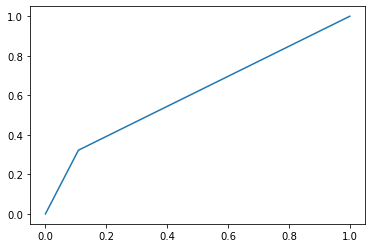

In [28]:
if dual_mode:
  printAuc(val_target,xgb_model.predict(val_x),"XGBOOST")

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, feature_names=preprocessor.get_feature_names_out())
shap_values = explainer(test_x)


In [ ]:
shap.plots.bar(shap_values,max_display=test_x.shape[1])

# 3 RandomForest

In [43]:
# !pip install -U imbalanced-learn
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


#rnd_clf = BalancedRandomForestClassifier(n_estimators=1300,class_weight="balanced_subsample", max_depth=6,criterion="gini", n_jobs=-1) #66
#rnd_clf = BalancedRandomForestClassifier(n_estimators=1900,class_weight="balanced_subsample", max_depth=12,criterion="gini", n_jobs=-1) #66.5
# rnd_clf = BalancedRandomForestClassifier(n_estimators=1000,class_weight="balanced_subsample",
#                                          min_samples_split= 2,min_samples_leaf=2,
#                                          max_features='sqrt', 
#                                          max_depth=5,criterion="gini", n_jobs=-1,bootstrap=True)#66.41

# rnd_clf = BalancedRandomForestClassifier(n_estimators=1000,class_weight="balanced_subsample",min_samples_split= 2,min_samples_leaf=1,
#                                          max_features='log2', 
#                                          max_depth=10,criterion="gini", n_jobs=-1,bootstrap=True)#66.41

rnd_clf = BalancedRandomForestClassifier(n_estimators=800,class_weight="balanced_subsample",min_samples_split= 4,min_samples_leaf=4,
                                         max_features='sqrt', 
                                         max_depth=10,criterion="gini", n_jobs=-1,bootstrap=True)#66.41


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=1)
n_scores = cross_val_score(rnd_clf, train_x, train_target, scoring='roc_auc',
                           cv=cv, n_jobs=-1, error_score='raise')


/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataCon

In [44]:
n_scores

array([0.74012992, 0.73194469, 0.75256949, 0.69843503, 0.71322261,
       0.7392802 , 0.75015155, 0.73179104, 0.7205692 , 0.70725247,
       0.7435567 , 0.75937166, 0.71440959, 0.67046356, 0.75057849,
       0.72597128, 0.72114436, 0.73114643, 0.73599124, 0.72573123])

/var/folders/rw/b3q2sx811696d279pv96sgt00000gn/T/ipykernel_2164/4088791813.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(train_x, train_target)


[[4744 2368]
 [  81  161]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      7112
           1       0.06      0.67      0.12       242

    accuracy                           0.67      7354
   macro avg       0.52      0.67      0.46      7354
weighted avg       0.95      0.67      0.77      7354

0.6661654379979361


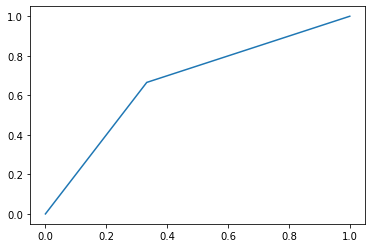

In [45]:
rnd_clf.fit(train_x, train_target)
if dual_mode:
  printAuc(val_target,rnd_clf.predict(val_x),"RandomF")#0.6740667617994032

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['log2','sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 50, num = 11)],
               'min_samples_split': [2, 5, 10,15],
               'min_samples_leaf': [1,2, 4],
               'class_weight':['balanced_subsample'],
               'bootstrap': [True, False]}

In [34]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(scoring='roc_auc',estimator = 
                               BalancedRandomForestClassifier(), 
                               param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x, train_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataCon

RandomizedSearchCV(cv=3, estimator=BalancedRandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'max_depth': [5, 9, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [35]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 15,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 45,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [36]:
rf_random.cv_results_

{'mean_fit_time': array([ 8.06629817,  1.11753416,  4.85953561,  7.34987227,  2.06659635,
         3.35663009,  8.04000115,  3.88577612,  7.703408  ,  6.62862372,
        20.92585762,  7.82608   ,  8.77395837,  1.05911557,  6.67296839,
        19.62322632,  3.28951788,  8.64628283,  5.37146759, 11.35406788,
         5.93551628,  9.49782729,  9.25713221,  7.04430509, 10.52728375,
         2.93639286,  4.81286565, 11.36062328,  2.09253558,  4.49959413,
        14.18421737,  2.22072959,  3.56580424,  8.03518939,  8.91028436,
         3.42853467,  7.69461187,  1.00582894,  4.76122626,  3.91662709,
        11.74251199,  3.375163  ,  2.207985  ,  3.13732044, 14.58277432,
         3.42474898,  7.12414161, 14.16874353, 13.71056644,  2.52968113,
         5.1334761 ,  5.26131495,  2.97621957,  1.03249828,  8.79122464,
         9.50789992,  6.54912305,  5.25530926,  9.062428  ,  1.07585398,
         7.10754768,  8.63319508,  6.23895264, 10.43422143,  7.29767791,
         4.48655693,  9.10037176, 

In [37]:
#generateCsv(rnd_clf.predict_proba(test_x),rnd_clf.predict(test_x),"RandomF")

In [32]:
imp_df = pd.DataFrame({'col':preprocessor.get_feature_names_out(), 'impval':rnd_clf.feature_importances_})

In [33]:
imp_df

,col,impval
0,num__atlas_age65andolderpct2010,0.010037
1,num__atlas_naturalchangerate1016,0.013636
2,num__atlas_net_international_migration_rate,0.009984
3,num__atlas_orchard_farms12,0.012684
4,num__atlas_pct_diabetes_adults13,0.008634
...,...,...
117,cat__sex_cd_M,0.000969
118,binary__cms_disabled_ind,0.035147
119,binary__cms_dual_eligible_ind,0.008325
120,binary__cms_low_income_ind,0.025370


In [39]:
#imp_df.to_csv("feature_importance_feateng.csv")

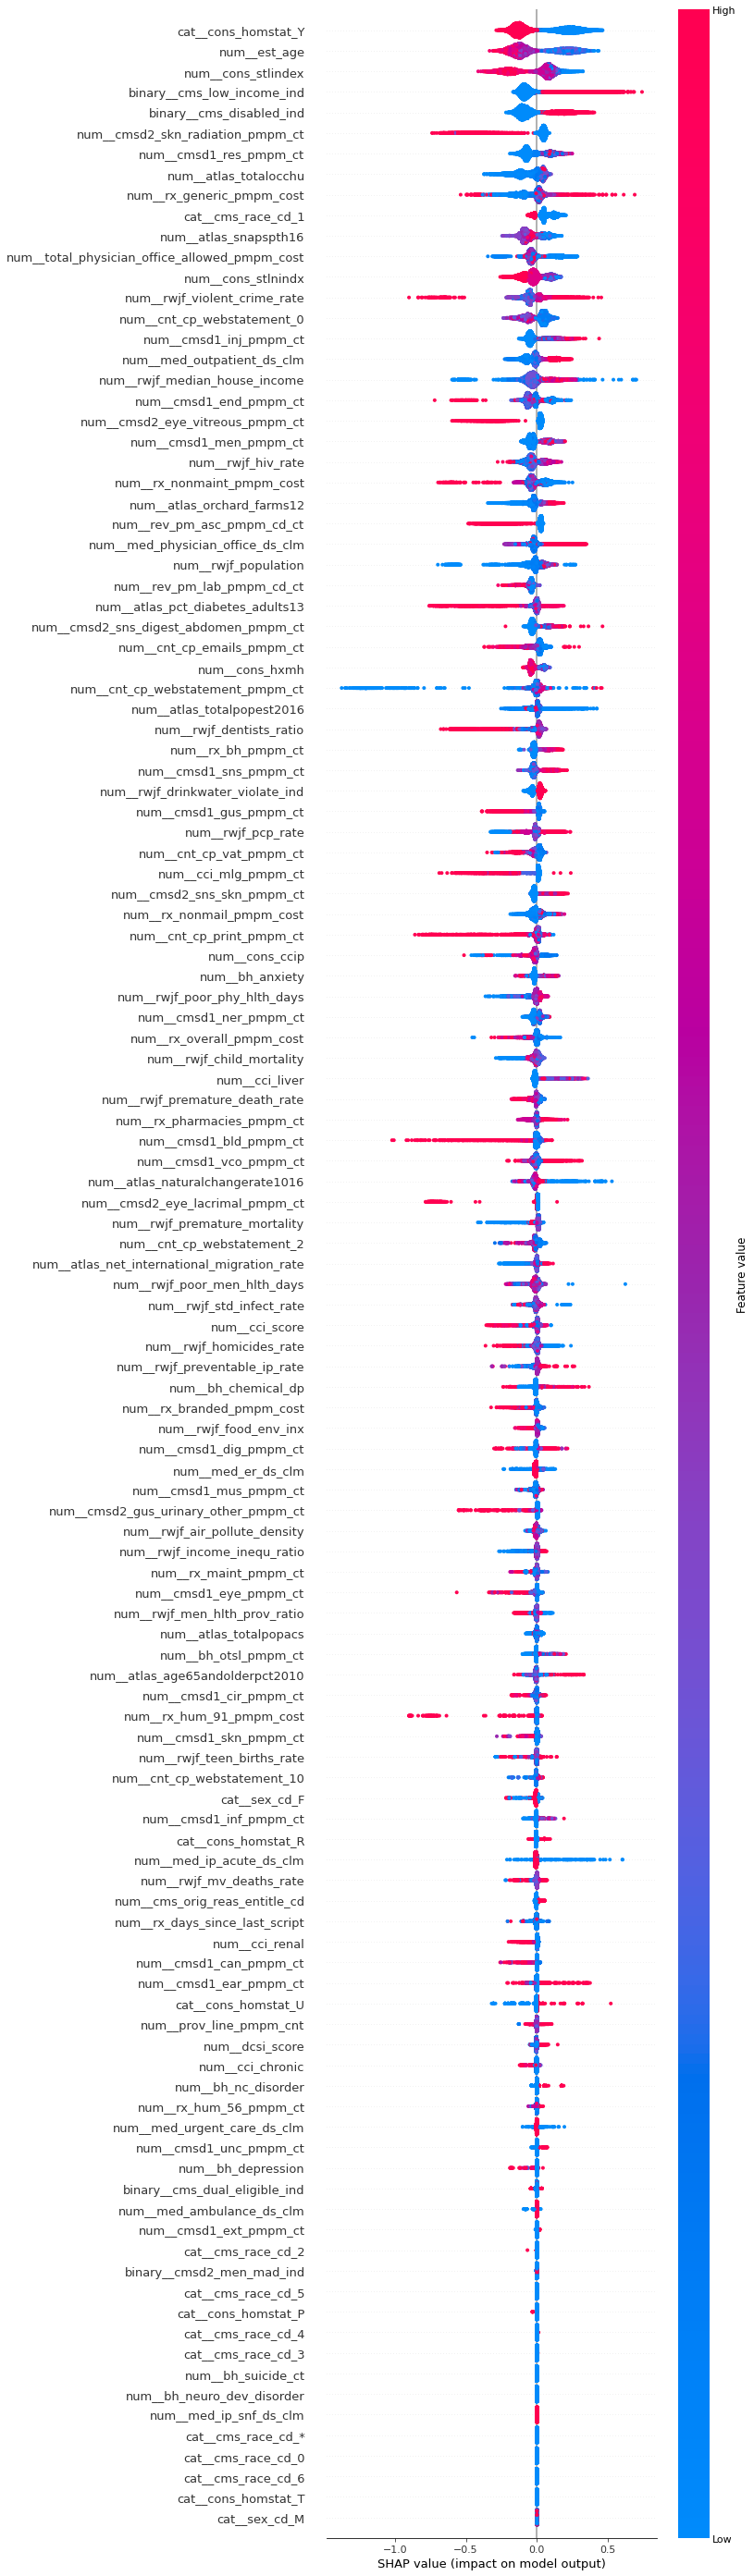

In [40]:
shap.plots.beeswarm(shap_values,max_display=test_x.shape[1])


In [41]:
clustering = shap.utils.hclust(train_x, train_target)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
No/low signal found from feature 0 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 1 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 2 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 3 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 4 (this is typically caused by constant or near-constant features)! Cluster distances can't be

KeyboardInterrupt: 

In [ ]:
shap.plots.bar(shap_values, clustering=clustering,max_display=test_x.shape[1])

In [52]:
results_df=pd.read_csv('../../2022_Competition_Holdout-result.csv')


In [59]:
len(results_df.columns)

883

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
flagged_df = train_df[train_df['hi_flag']==1]
notFlagged = train_df[train_df['hi_flag']==0]
print(flagged_df.shape)
print(notFlagged.shape)


(2118, 891)
(46182, 891)


In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

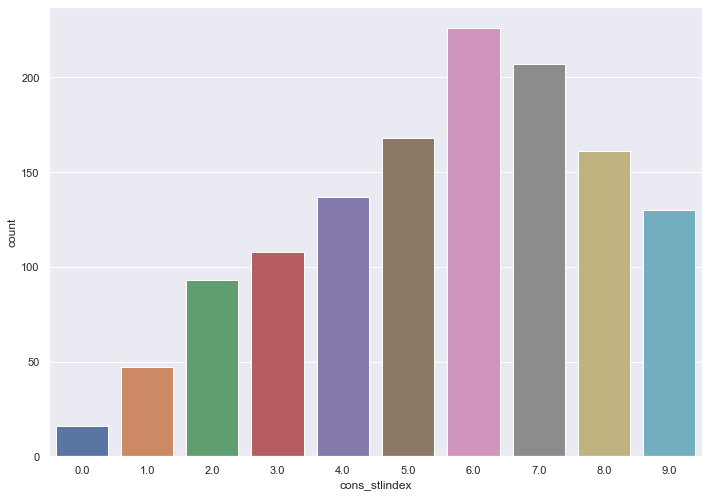

In [120]:

counts = flagged_df['cons_stlindex'].value_counts().rename_axis('cons_stlindex').reset_index(name='count')
ax = sns.barplot(x='cons_stlindex', y='count', data=counts)


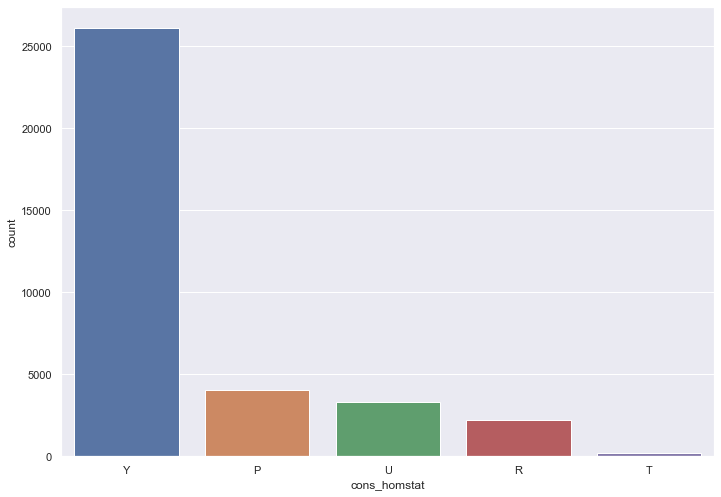

In [123]:

counts = notFlagged['cons_homstat'].value_counts().rename_axis('cons_homstat').reset_index(name='count')
ax = sns.barplot(x='cons_homstat', y='count', data=counts)


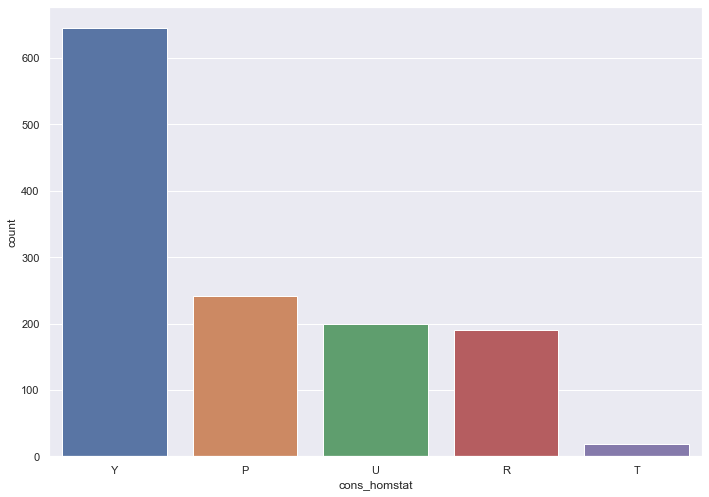

In [124]:
counts = flagged_df['cons_homstat'].value_counts().rename_axis('cons_homstat').reset_index(name='count')
ax = sns.barplot(x='cons_homstat', y='count', data=counts)


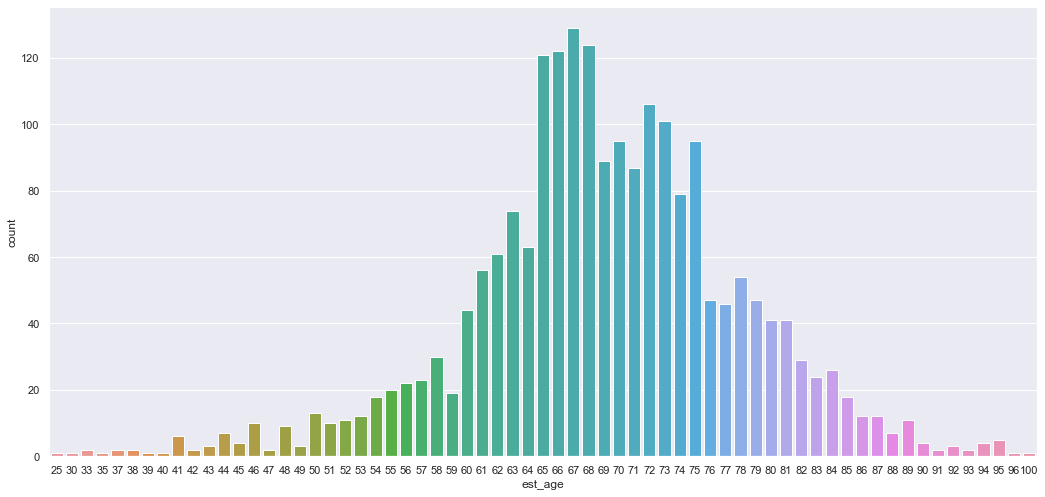

In [128]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
counts = flagged_df['est_age'].value_counts().rename_axis('est_age').reset_index(name='count')
ax = sns.barplot(x='est_age', y='count', data=counts)

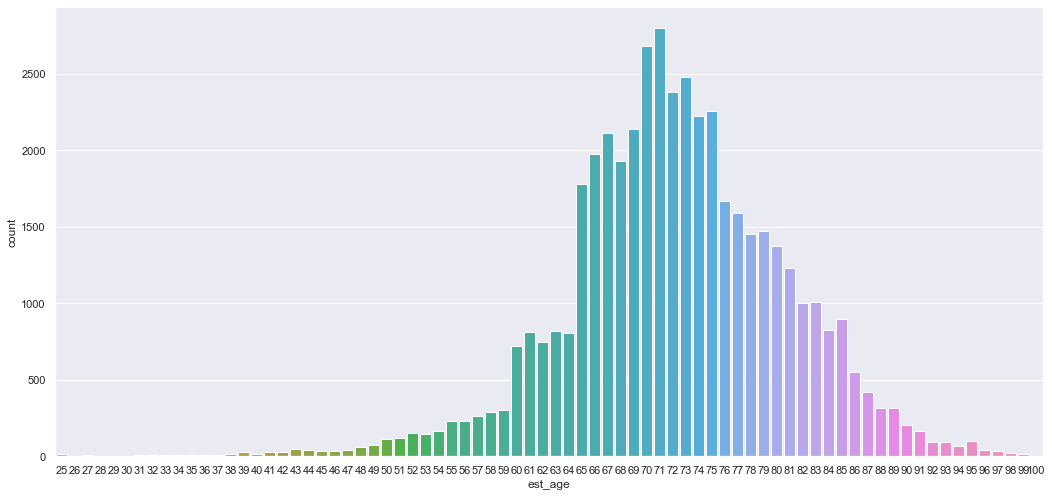

In [129]:
counts = notFlagged['est_age'].value_counts().rename_axis('est_age').reset_index(name='count')
ax = sns.barplot(x='est_age', y='count', data=counts)

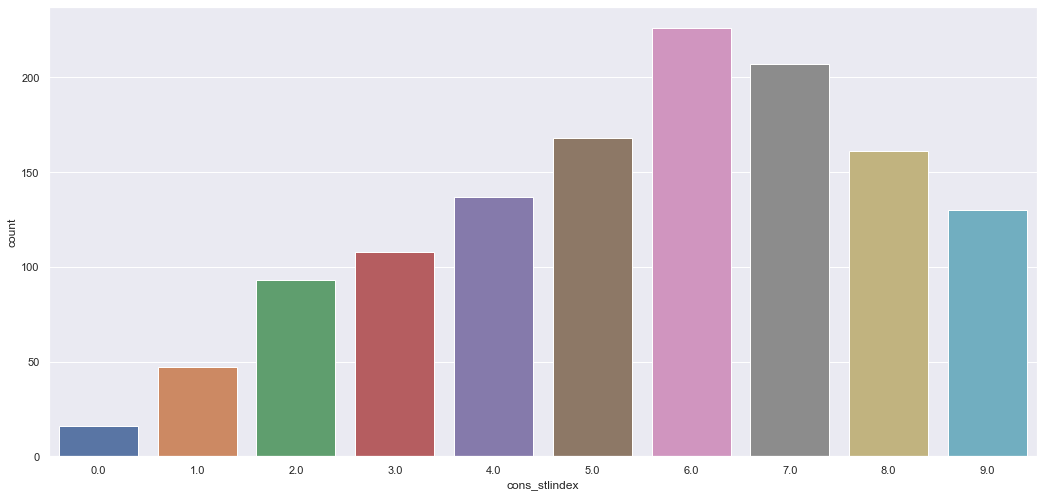

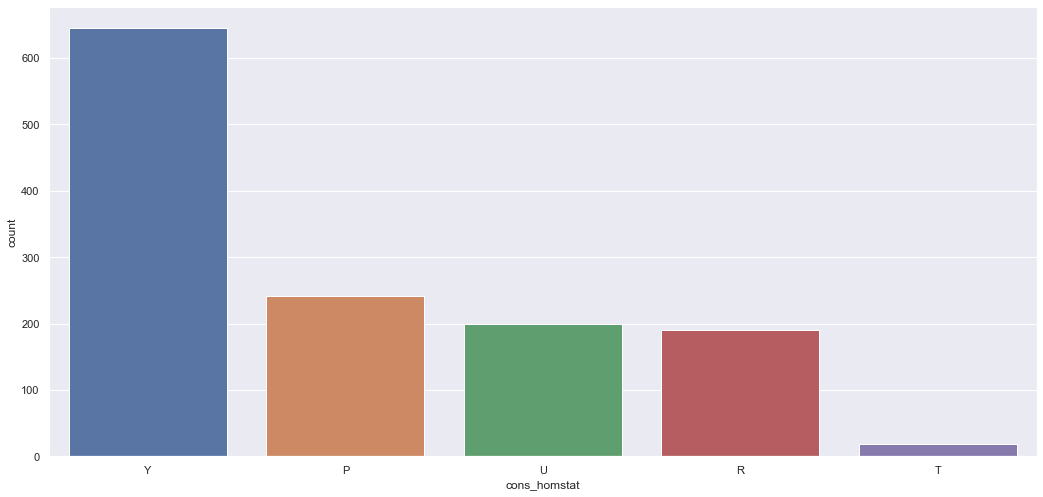

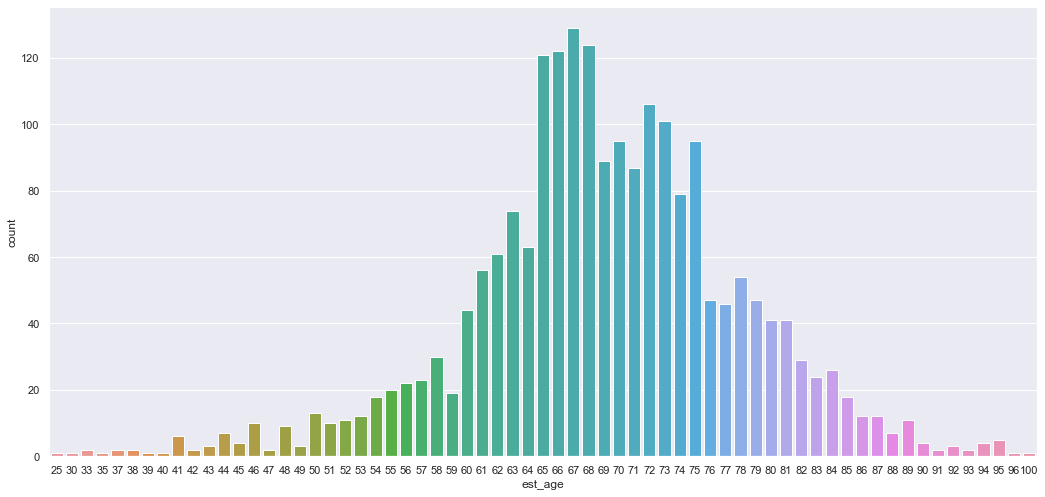

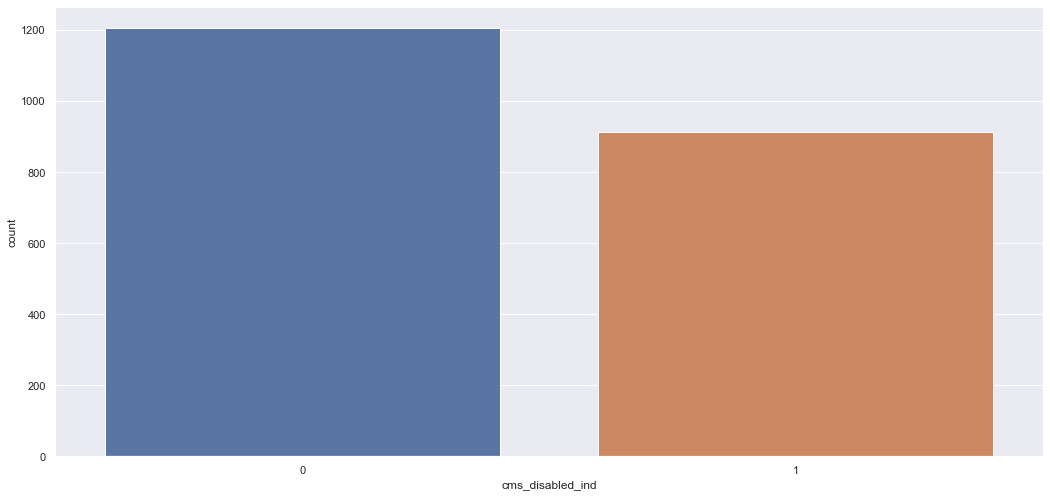

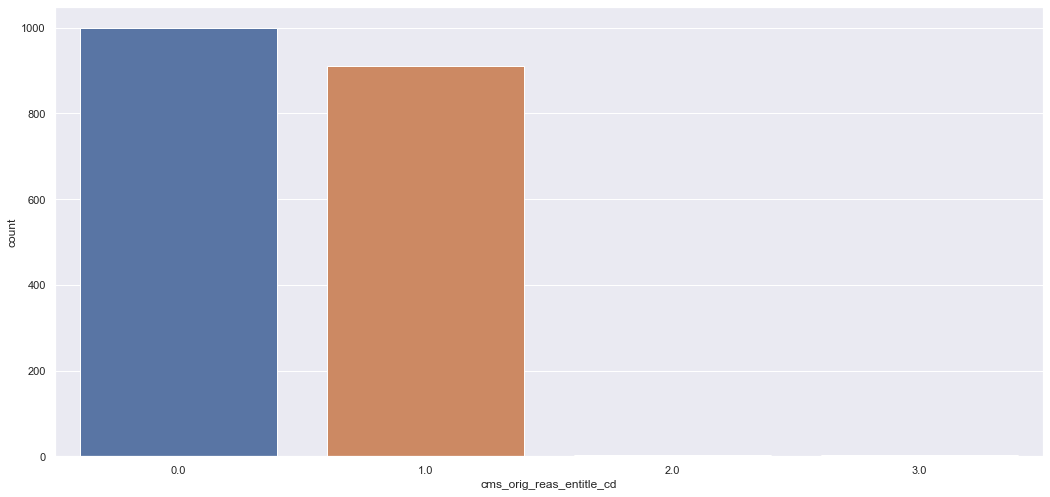

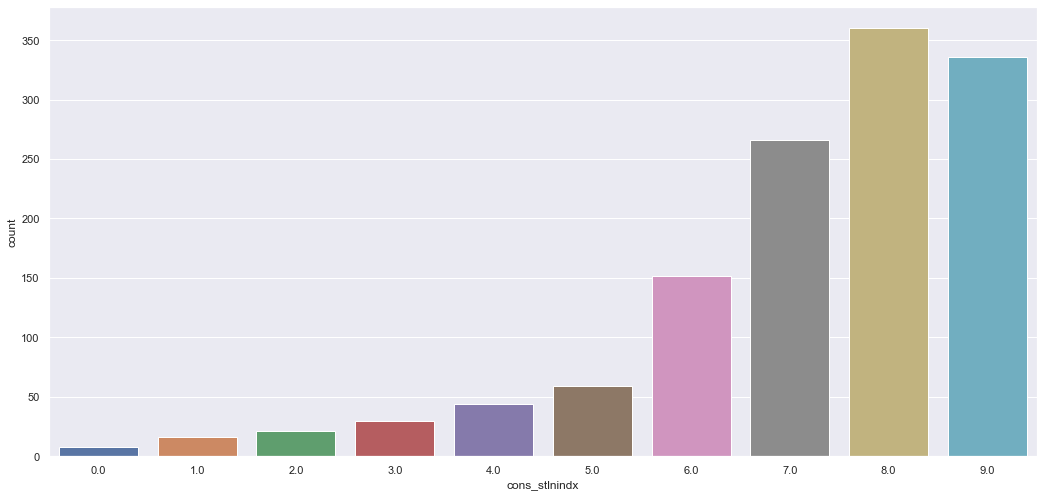

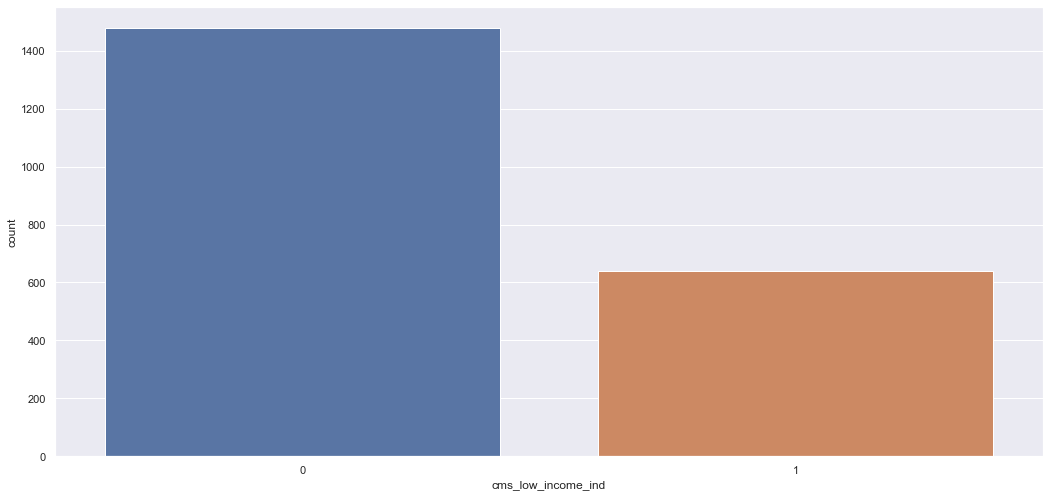

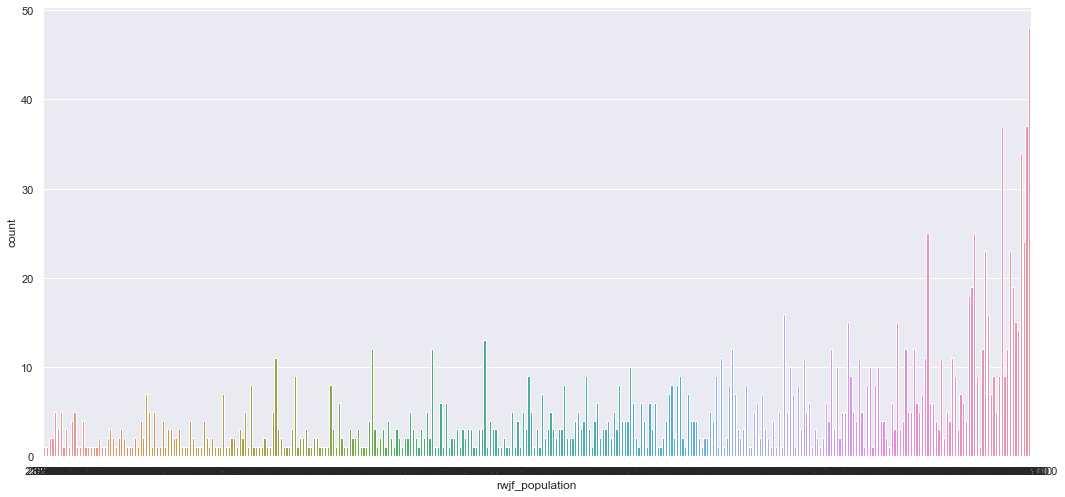

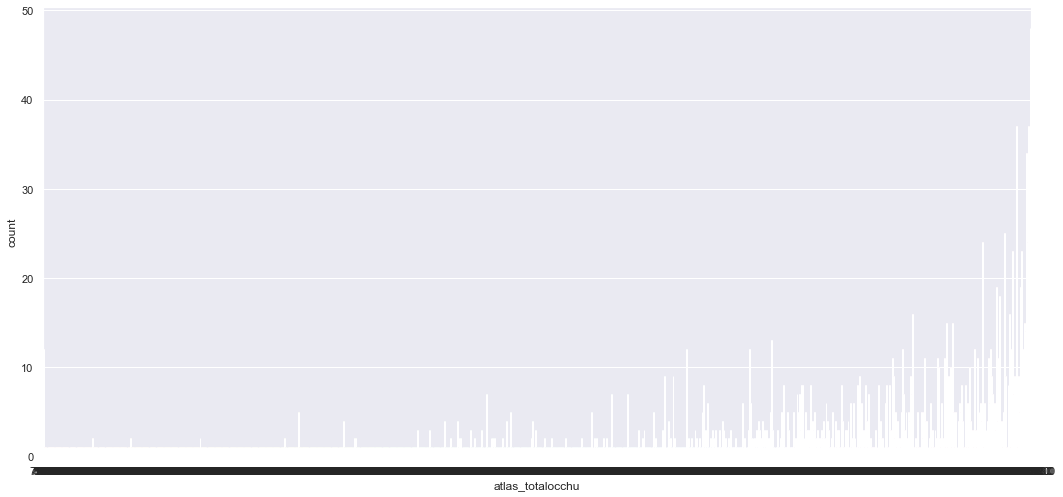

In [133]:
plot_cols=['cons_stlindex',
'cons_homstat',
'est_age',
'cms_disabled_ind',
'cms_orig_reas_entitle_cd',
'cons_stlnindx',
'cms_low_income_ind',
'rwjf_population',
'atlas_totalocchu']
for col in plot_cols:
    plt.figure()
    counts = flagged_df[col].value_counts().rename_axis(col).reset_index(name='count')
    ax = sns.barplot(x=col, y='count', data=counts)
    

In [106]:
train_df_flagged=train_df[train_df['hi_flag']==1]

In [102]:
results_df.shape

(12220, 883)